Accuracy: 0.965

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



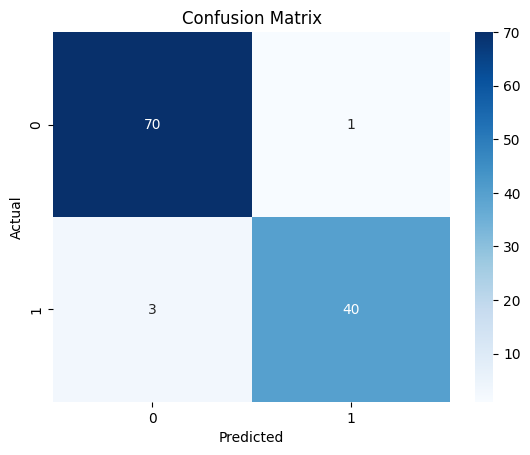

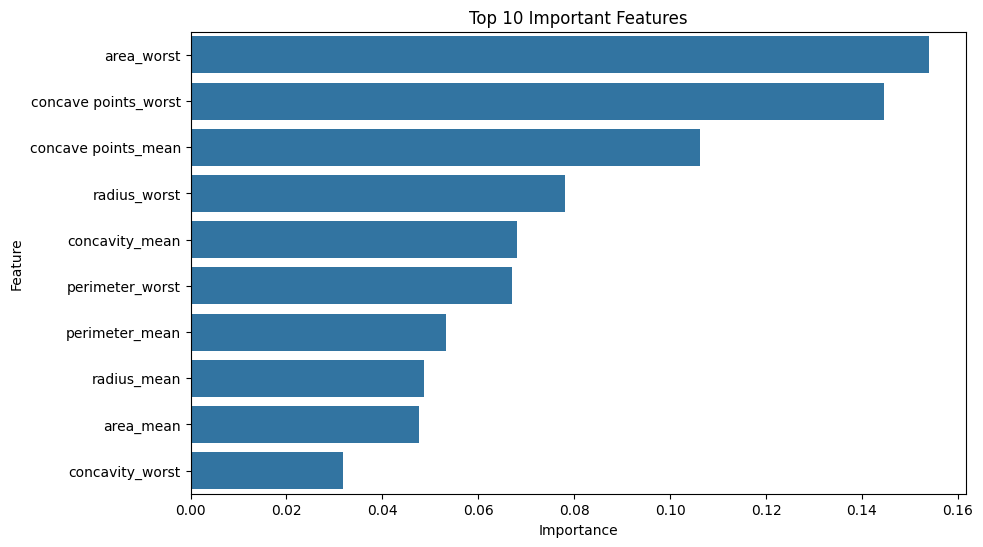

In [5]:
# ✅ Task 3: Predictive Analytics for Resource Allocation
# Breast Cancer Dataset - Predicting Issue Priority

# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Load and preprocess the data
# Load the dataset (ensure 'data.csv' is in the same directory)
df = pd.read_csv('data.csv')

# Drop unnecessary columns
df.drop(columns=["id", "Unnamed: 32"], inplace=True)

# Encode diagnosis: M = High priority, B = Low priority
df['priority'] = df['diagnosis'].map({'M': 'High', 'B': 'Low'})

# Drop original diagnosis column
df.drop(columns=["diagnosis"], inplace=True)

# Encode priority to numeric labels
df['priority'] = df['priority'].map({'High': 1, 'Low': 0})

# Step 3: Train-test split
X = df.drop(columns=["priority"])
y = df["priority"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Step 5: Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 3))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Optional: Feature Importance Plot
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title("Top 10 Important Features")
plt.show()
